<a href="https://colab.research.google.com/github/Kumaava/tf-deepds/blob/master/LeadsData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Viteos**

```
Understading features and analysing Sales Lead data
```



### Loading Libraries

In [0]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd

# import Tokenizer and pad_sequences
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings


# Exploring and preprocessing
import re
import copy
import time
import warnings
import numpy as np
import pandas as pd
from textblob import Word
warnings.filterwarnings('ignore')

from textblob import TextBlob
from sklearn import preprocessing

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.base import TransformerMixin, BaseEstimator


# models 
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

# pipelines
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Visualization
import seaborn as sns
color = sns.color_palette("GnBu_d")
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import tensorflow_data_validation as tfdv


In [0]:
#!pip install tensorflow-data-validation

In [0]:
# display options 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Loading and cleaning


In [0]:
# defining datetime columns 
datetime_columns = ['Created On',
 'Est. Start of Service',
 'Fee Proposal Issued',
 'Fee Proposal Accepted',
 'Actual Close Date',
 'At Stage Since']

# load data
dataset = pd.read_excel('sample_data/SData.xlsx', parse_dates=datetime_columns)
dataset_copy = dataset.copy()

# removing space from column names 
dataset_copy.columns = dataset_copy.columns.str.replace(' ', '')

# removing unnammed columns 
dataset_copy = dataset_copy.loc[:, ~dataset_copy.columns.str.contains('^Unnamed')]

In [78]:
dataset_copy.columns

Index(['SalesLeadID', 'LeadName', 'LeadDescription', 'VPApplicationID', 'Status', 'StatusReason', 'ProposalWonReason', 'SalesStage', 'GeographicalCrossSell', 'Upsell', 'ExpectedEntityCount', 'AssociatedEntityCount', 'Leadpunchedby', 'BusinessTeam(CreatedBy)(User)', 'SalesOwner', 'BusinessTeam(OwningUser)(User)', 'ReferralMagnificientconsultingOffice', 'ReferralMagnificientconsultingcontact', 'ReferralMagnificientconsultingTeam', 'Servicing/ReceivingMagnificientconsultingOffice', 'Servicing/ReceivingMagnificientconsultingContact', 'Servicing/ReceivingMagnificientconsultingTeam', 'CreatedOn', 'Est.StartofService', 'FeeProposalIssued', 'FeeProposalAccepted', 'ActualCloseDate', 'Currency', 'Est.Revenue', 'Est.Revenue(Base)', 'CampaignSource', 'InflowSource', 'Account', 'BusinessPartnerAccount', 'BusinessPartnerContact', '3rdPartyServiceProvider', 'Receiving3rdPartyServiceProvider', 'Jurisdiction(Receiving3rdPartyServiceProvider)(3rdPartyServiceProvider)',
       'ProjectNumber(ProjectName)

#### Splitting the data

In [0]:
y = dataset_copy.pop("Status")
X = dataset_copy

# shuffle=True is important for more randomness in test_train split of data
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.33,  random_state=42)

### Automated data cleaning using datacleaner

In [0]:
#!pip install datacleaner
#from datacleaner import autoclean
from datacleaner import autoclean
my_clean_dataset_copy = autoclean(dataset_copy)

# **Univariate Analysis**


### EDA using TensorFlow TFDV

###  Investigating and visualizing dataset
```
Using tfdv to create statistics, create schemas for trainig and testing data, visualize the statistics created and also compare the feature stats for training and testing.
```

In [57]:
# Generating statistics
stats = tfdv.generate_statistics_from_dataframe(dataframe=X_train)

# visualizing traing dataset
tfdv.visualize_statistics(stats)

In [35]:
# displaying schema
schema = tfdv.infer_schema(statistics=stats)
tfdv.display_schema(schema=schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'SalesLeadID',BYTES,required,,-
'LeadName',BYTES,required,,-
'LeadDescription',BYTES,required,,-
'VPApplicationID',BYTES,optional,single,-
'StatusReason',STRING,required,,'StatusReason'
'ProposalWonReason',STRING,optional,single,'ProposalWonReason'
'SalesStage',STRING,required,,'SalesStage'
'GeographicalCrossSell',STRING,required,,'GeographicalCrossSell'
'Upsell',STRING,required,,'Upsell'


,Values
Domain,
'StatusReason',"'Client Cancelled Deal', 'Competitor - Existing Relationship', 'Competitor - Expertise', 'Competitor - Global Coverage', 'Competitor - Pricing', 'Competitor - Service Offering', 'Compliance', 'Existing Relationship', 'Expertise', 'Global Coverage', 'In Progress', 'On Hold due to COVID-19', 'Own Substance', 'Postponed - may reopen', 'Pricing', 'Service Offering'"
'ProposalWonReason',"'Existing Relationship', 'Expertise', 'Global Coverage', 'Pricing', 'Service Offering'"
'SalesStage',"'3. Opportunity Identified', '4. Fee Proposal Issued', '5. Fee Proposal Accepted', '6. Client Agreements Issued', '7. Client Agreements Accepted', '8. Handed over to F&C'"
'GeographicalCrossSell',"'No', 'Yes'"
'Upsell',"'No', 'Yes'"
'\'BusinessTeam(CreatedBy)(User)\'',"'LocationOffice01', 'LocationOffice02', 'LocationOffice03', 'LocationOffice06', 'LocationOffice08', 'LocationOffice13', 'LocationOffice16', 'LocationOffice19', 'LocationOffice21', 'LocationOffice22', 'LocationOffice24', 'LocationOffice25', 'LocationOffice27', 'LocationOffice28', 'LocationOffice29', 'LocationOffice31', 'UserID01', 'UserID02', 'UserID04', 'UserID05', 'UserID06', 'UserID07', 'UserID08', 'UserID09', 'UserID10', 'UserID102', 'UserID11', 'UserID12', 'UserID13', 'UserID14', 'UserID15', 'UserID17', 'UserID18', 'UserID19', 'UserID20', 'UserID21', 'UserID22', 'UserID23', 'UserID24', 'UserID26', 'UserID27', 'UserID28', 'UserID29', 'UserID31', 'UserID32', 'UserID33', 'UserID34', 'UserID35', 'UserID36', 'UserID37', 'UserID38', 'UserID40', 'UserID41', 'UserID42', 'UserID43', 'UserID44', 'UserID45', 'UserID46', 'UserID47', 'UserID48', 'UserID49', 'UserID50', 'UserID51', 'UserID52', 'UserID53', 'UserID55', 'UserID56', 'UserID57', 'UserID58', 'UserID59', 'UserID60', 'UserID61', 'UserID62', 'UserID63', 'UserID65', 'UserID67', 'UserID68', 'UserID69', 'UserID71', 'UserID72', 'UserID73', 'UserID75', 'UserID76', 'UserID78', 'UserID80', 'UserID81', 'UserID83', 'UserID84', 'UserID85', 'UserID86', 'UserID87', 'UserID88', 'UserID90', 'UserID91', 'UserID92', 'UserID94', 'UserID95', 'UserID96', 'UserID97', 'UserID98'"
'ReferralMagnificientconsultingOffice',"'LocationOffice01', 'LocationOffice02', 'LocationOffice03', 'LocationOffice04', 'LocationOffice05', 'LocationOffice06', 'LocationOffice07', 'LocationOffice08', 'LocationOffice09', 'LocationOffice10', 'LocationOffice11', 'LocationOffice12', 'LocationOffice13', 'LocationOffice14', 'LocationOffice15', 'LocationOffice16', 'LocationOffice17', 'LocationOffice18', 'LocationOffice19', 'LocationOffice20', 'LocationOffice21', 'LocationOffice22', 'LocationOffice23', 'LocationOffice24', 'LocationOffice25', 'LocationOffice26', 'LocationOffice27', 'LocationOffice28', 'LocationOffice29', 'LocationOffice30', 'LocationOffice31'"
'Servicing/ReceivingMagnificientconsultingOffice',"' ', 'LocationOffice01', 'LocationOffice02', 'LocationOffice03', 'LocationOffice04', 'LocationOffice05', 'LocationOffice06', 'LocationOffice07', 'LocationOffice08', 'LocationOffice09', 'LocationOffice10', 'LocationOffice11', 'LocationOffice12', 'LocationOffice13', 'LocationOffice14', 'LocationOffice15', 'LocationOffice16', 'LocationOffice17', 'LocationOffice18', 'LocationOffice19', 'LocationOffice20', 'LocationOffice21', 'LocationOffice22', 'LocationOffice23', 'LocationOffice24', 'LocationOffice25', 'LocationOffice26', 'LocationOffice27', 'LocationOffice28', 'LocationOffice29', 'LocationOffice30', 'LocationOffice31', 'LocationOffice32'"
'Currency',"'Australian Dollar', 'British Pound', 'Chinese Yuan Renminbi', 'Danish Krone', 'Euro', 'Hong Kong Dollar', 'Japanese Yen', 'New Zealand Dollar', 'Singapore Dollar', 'Swiss Franc', 'US Dollar'"


In [47]:
# Compute stats for evaluation data
eval_stats = tfdv.generate_statistics_from_dataframe(dataframe=X_test)

# Compare evaluation data with training data
tfdv.visualize_statistics(lhs_statistics=eval_stats, rhs_statistics=stats,
                          lhs_name='EVAL_DATASET', rhs_name='TRAIN_DATASET')

### Selecting categorical and continuous variables 

```
Finding all types of columns for specific preprocessing steps
```

In [0]:
def finding_columns_type(dataset_copy):

  """
  Finding all types of columns, lists to be used for specific pre-processing steps

  input: Dataframe
  output: columns dict having all the columns category wise 
          i.e datetime, categorical and numerical

  """

  cat_columns= list(i for i in dataset_copy.columns if dataset_copy.dtypes[i]=='object')
  numeric_columns = list(dataset_copy.select_dtypes([np.number]).columns)
  datetime_columns = list(col for col in dataset_copy.columns if dataset_copy[col].dtype == 'datetime64[ns]')

  all_colums = {"cal_cols":cat_columns, "num_cols":numeric_columns, "date_cols":datetime_columns}

  if total_columns == len(dataset_copy.columns):
      print ("All columns captured, total length: {}".format(total_columns))

  return all_colums

In [158]:
all_colums = finding_columns_type(dataset_copy)

All columns captured, total length: 86


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
ohe = OneHotEncoder()
sc = StandardScaler()

# Bivariate Analysis 

Finding 

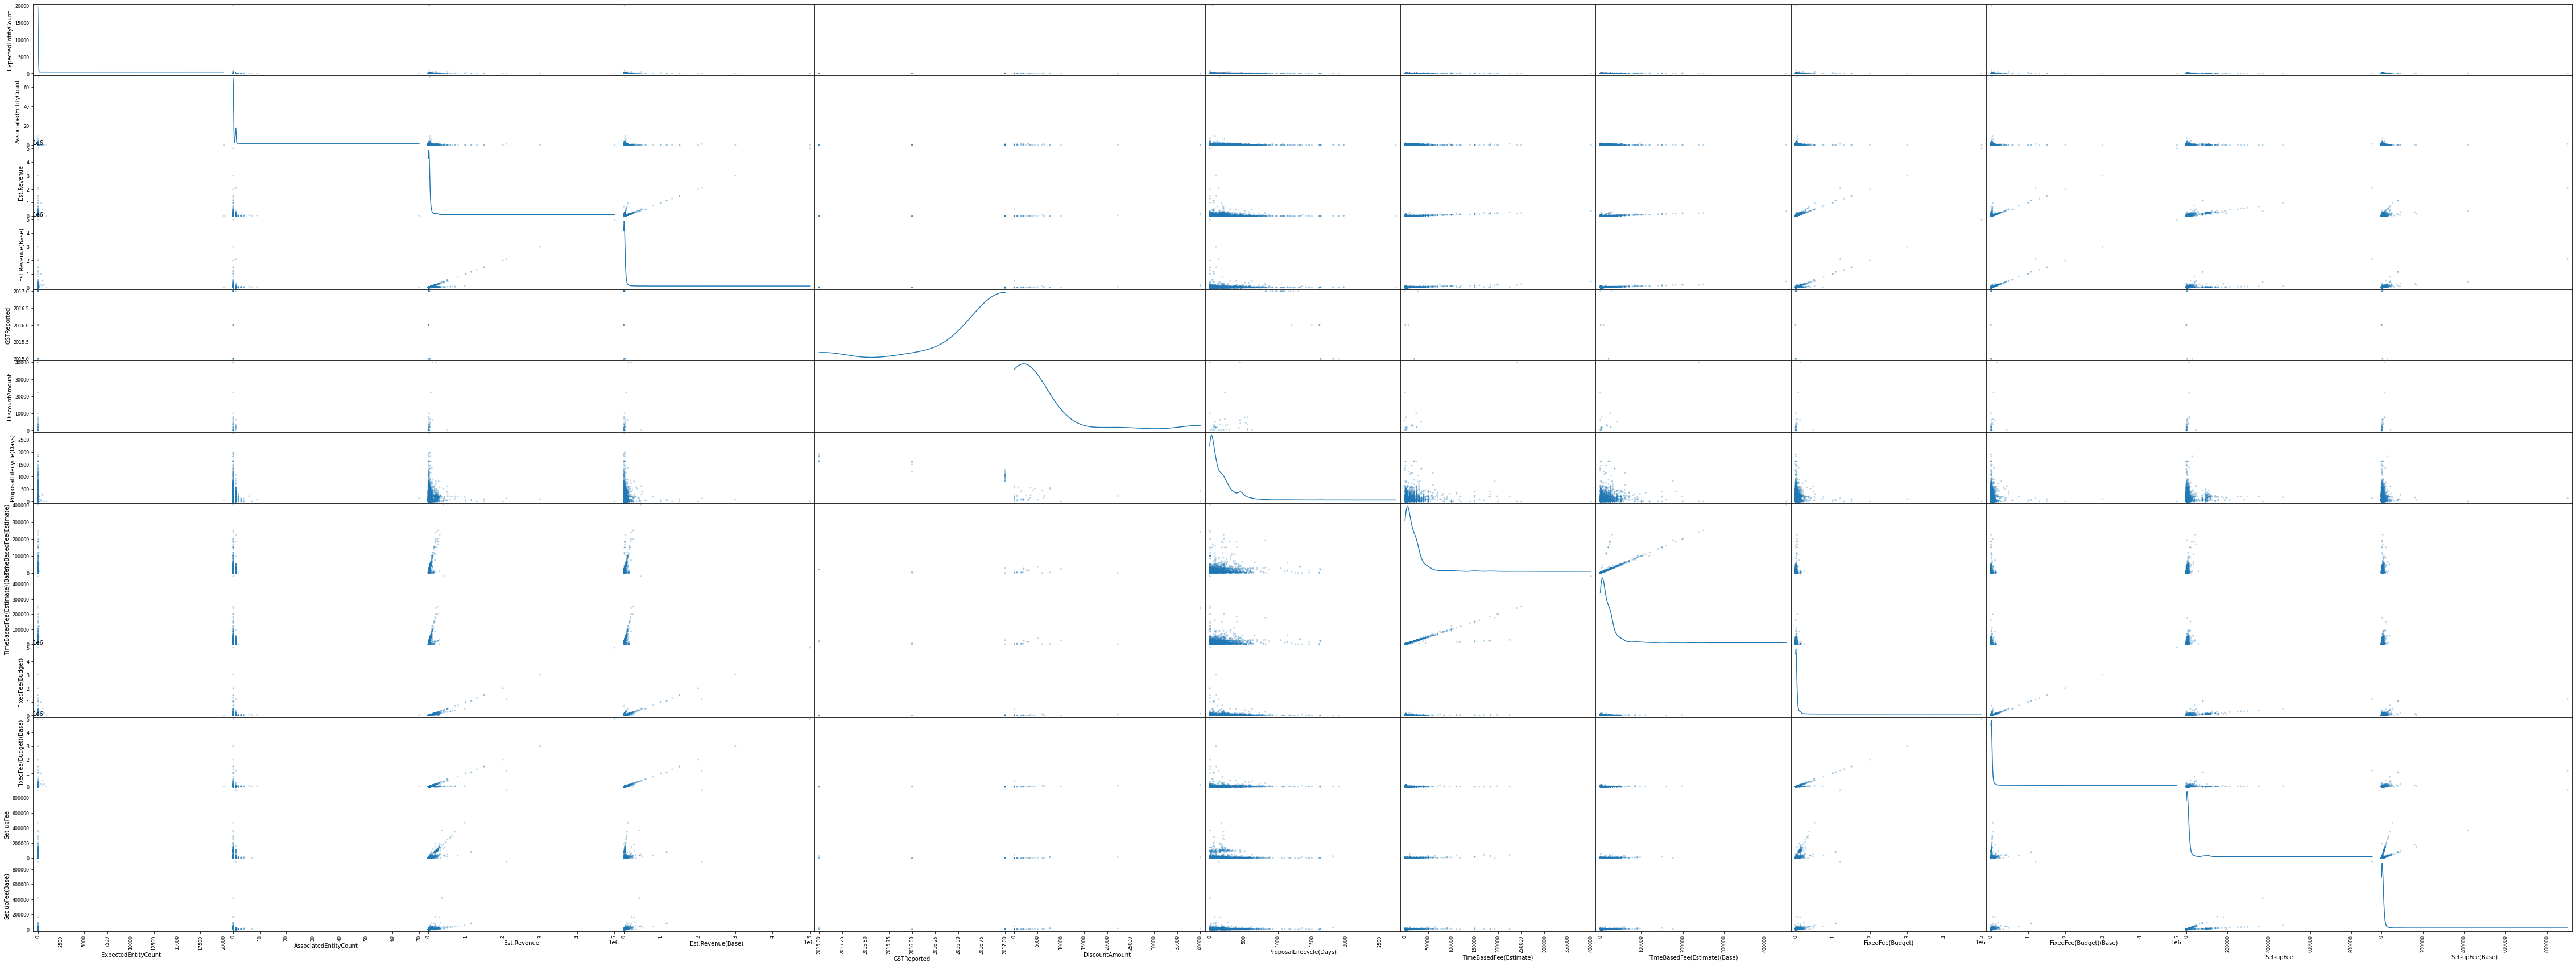

In [143]:
pd.plotting.scatter_matrix(dataset_copy[all_colums['num_cols']], alpha = 0.3, figsize = (80,30), diagonal = 'kde');

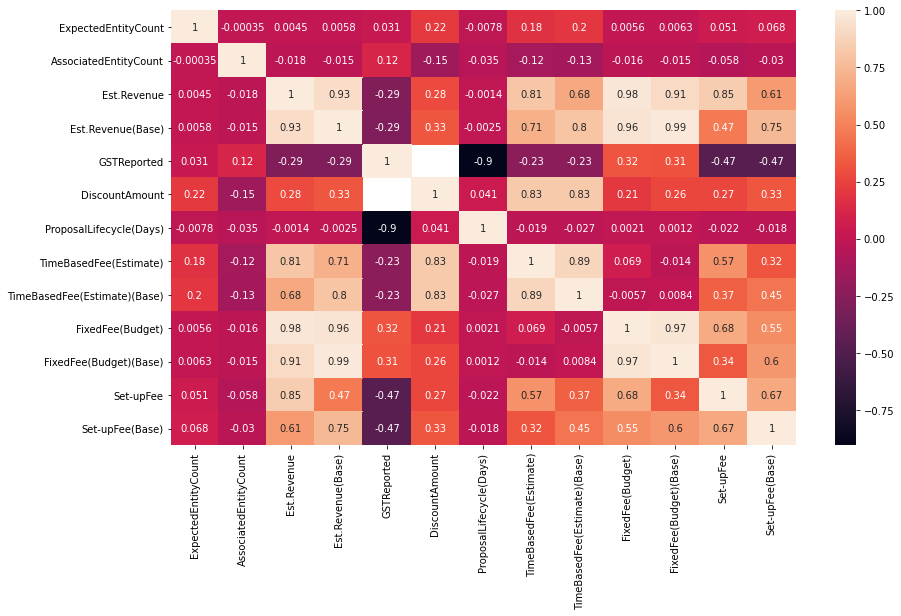

In [144]:
plt.figure(figsize=(14,8))
sns.heatmap(dataset_copy[all_colums['num_cols']].corr(), annot=True);


In [151]:
dataset_copy.columns

Index(['SalesLeadID', 'LeadName', 'LeadDescription', 'VPApplicationID', 'Status', 'StatusReason', 'ProposalWonReason', 'SalesStage', 'GeographicalCrossSell', 'Upsell', 'ExpectedEntityCount', 'AssociatedEntityCount', 'Leadpunchedby', 'BusinessTeam(CreatedBy)(User)', 'SalesOwner', 'BusinessTeam(OwningUser)(User)', 'ReferralMagnificientconsultingOffice', 'ReferralMagnificientconsultingcontact', 'ReferralMagnificientconsultingTeam', 'Servicing/ReceivingMagnificientconsultingOffice', 'Servicing/ReceivingMagnificientconsultingContact', 'Servicing/ReceivingMagnificientconsultingTeam', 'CreatedOn', 'Est.StartofService', 'FeeProposalIssued', 'FeeProposalAccepted', 'ActualCloseDate', 'Currency', 'Est.Revenue', 'Est.Revenue(Base)', 'CampaignSource', 'InflowSource', 'Account', 'BusinessPartnerAccount', 'BusinessPartnerContact', '3rdPartyServiceProvider', 'Receiving3rdPartyServiceProvider', 'Jurisdiction(Receiving3rdPartyServiceProvider)(3rdPartyServiceProvider)',
       'ProjectNumber(ProjectName)

#### Applying log transformation for univariate analysis

In [0]:
# replacing -inf with np.nan for numerical columns 
np.log(dataset_copy[all_colums['num_cols']]).replace([np.inf, -np.inf], np.nan)

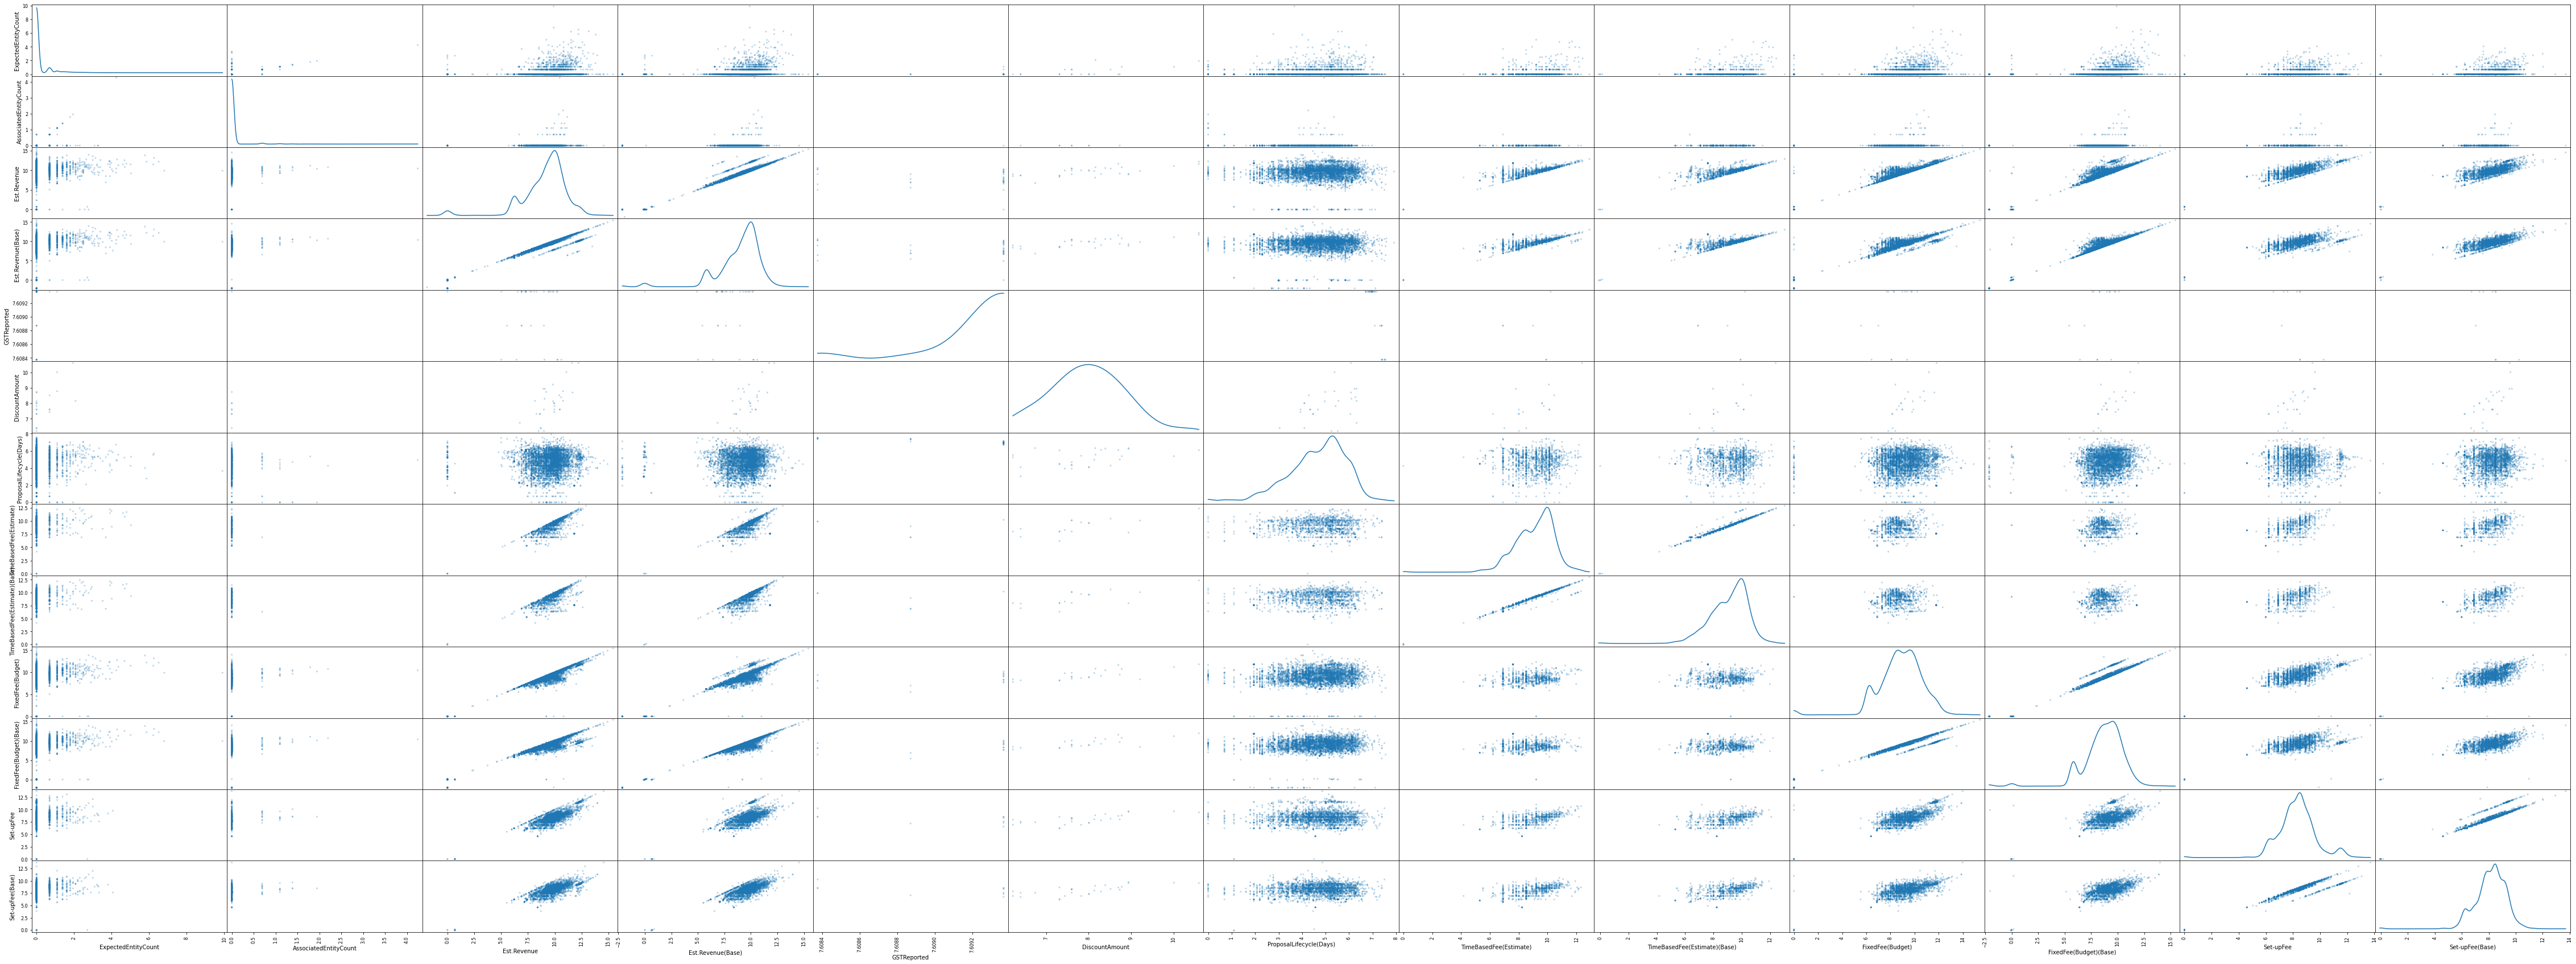

In [150]:
pd.plotting.scatter_matrix(np.log(dataset_copy[all_colums['num_cols']]).replace([np.inf, -np.inf], np.nan), alpha = 0.3, figsize = (80,30), diagonal = 'kde');

```
We will definitely apply log-transform in future pre-processing steps for numerical features. As we can see it transform a lot of features. 
```


## ``Preprocessing steps``

### **Steps**

#### **Column Type Identification**
#### First Identify the feature types and use specific pre-processing step for the feature type:

1.   Numerical features
2.   Categorical features
3.   Datetime Columns

#### Then find a suitale feature pre-propcessing step from below:

#### **Pre-processing on Column type**

##### **For Numerical features we have:**
* Feature Scale (normalization)
* Rescaling (Min-Max normalization )
* Standardization (Z-score normalization)
* Log Transform (mentioned below)

##### **For dateTime features:**
* We can create new features on datetime granularity
* Aggregate certain columns on datet-time values

##### **For Categorical features:**
* Label Encoding (for a lot of categorical variables)
* One-Hot Encoding (for cetegorical values less than 7)
* Binarizer (for boolean values)

#### **Missing values handling**
* Drop Columns with Missing Values
* A Better Option: Imputation
    * mean 
    * mode 
    * median 
    * ML models
* Remove the whole column depending on the percentage of NaN values
* An Extension To Imputation - add a new column that shows the location of the imputed entries

#### **Outlier Removal**
Identify the distribution and then best outlier detection technique
* Removing the tales of distribution

#### **Rank Transformation**
* Transform ranked data(ordinal data)

#### **Log Transformation**
*  Check the distribution of the data and apply log-transformation for skewed data 












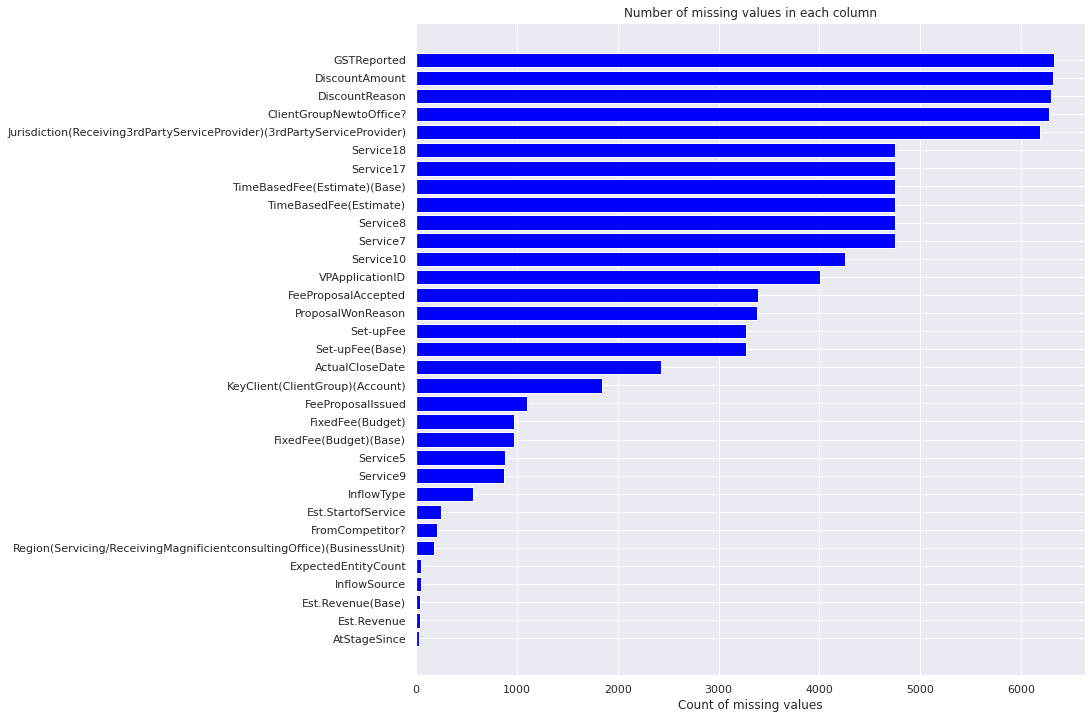

In [160]:
# Missing Value handling 
missing_df = dataset_copy.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,12))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

## Important considerations before creating a model

##### Data leakage (or leakage) happens when your training data contains information about the target, but similar data will not be available when the model is used for prediction.

#### **Target leakage**
##### Target leakage occurs when your predictors include data that will not be available at the time you make predictions.

#### **Train-Test Contamination**
##### A different type of leak occurs when you aren't careful to distinguish training data from validation data.

##### Recall that validation is meant to be a measure of how the model does on data that it hasn't considered before. You can corrupt this process in subtle ways if the validation data affects the preprocessing behavior. This is sometimes called train-test contamination.



In [0]:
### Applying XGB without removing features, will remove features depending on the relevence of features. 

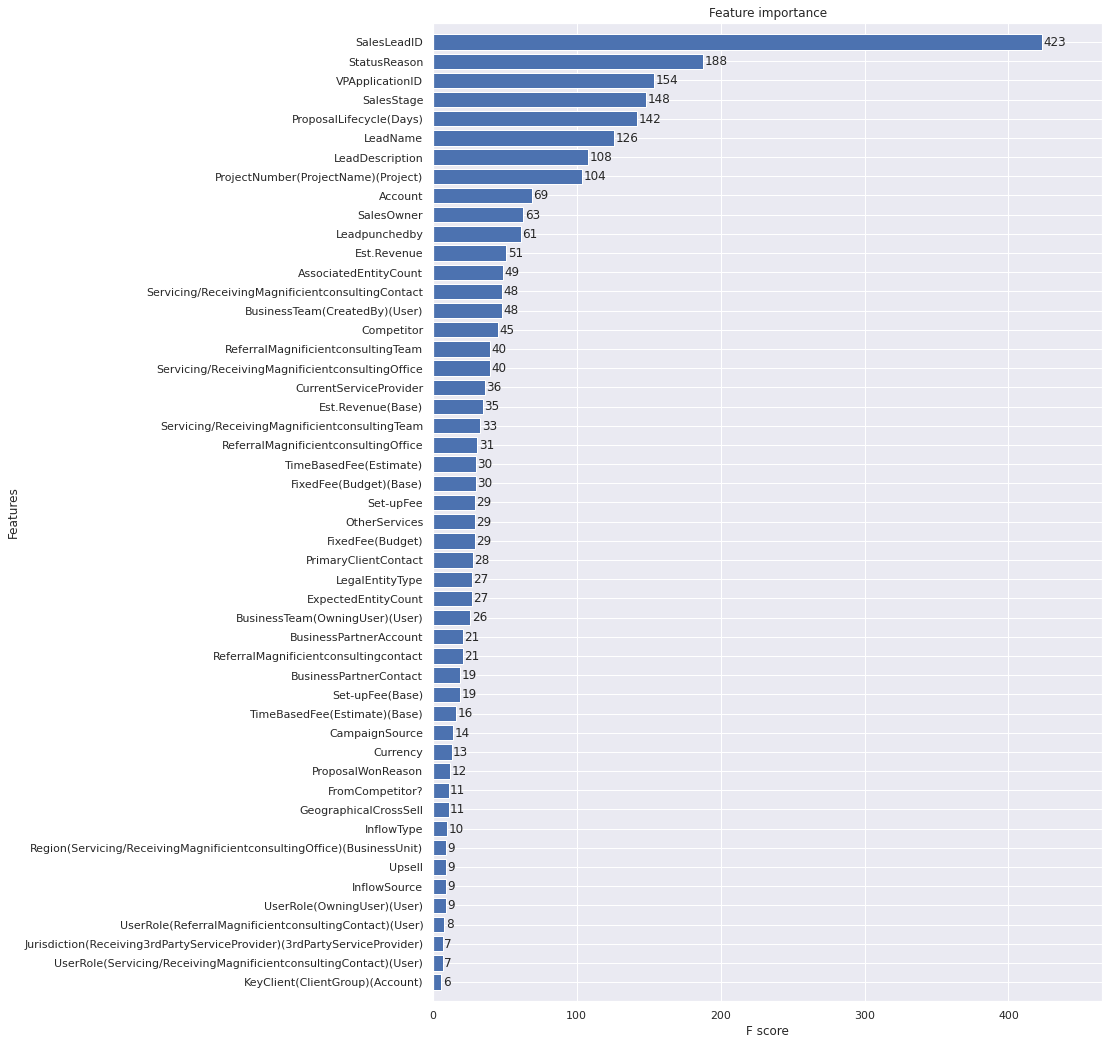

In [164]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

dataset_copy = dataset.copy()

#removing space from column names 
dataset_copy.columns = dataset_copy.columns.str.replace(' ', '')

# removing unnammed columns 
dataset_copy = dataset_copy.loc[:, ~dataset_copy.columns.str.contains('^Unnamed')]

#!pip install datacleaner
#from datacleaner import autoclean
from datacleaner import autoclean
my_clean_dataset_copy = autoclean(dataset_copy)

datetime_columns = ['CreatedOn',
 'Est.StartofService',
 'FeeProposalIssued',
 'FeeProposalAccepted',
 'ActualCloseDate',
 'AtStageSince']


my_clean_dataset_copy.drop(columns=datetime_columns,inplace=True)

y = my_clean_dataset_copy.pop("Status")
X = my_clean_dataset_copy

# shuffle=True is important for more randomness in test_train split of data
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.33,  random_state=42)

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:squarederror',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()
